# Figures S5, S6, S7

Code to generate plots for figure S5 of Nyquist et al 2022

In [53]:
import scanpy as sc
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"../helper_functions")
import bm_data_functions as bm
import plotting_helpers as ph
import pandas as pd
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [46]:
figure_S5_path = "../../Results/plots/figure_S5/"
figure_S6_path = "../../Results/plots/figure_S6/"
figure_S7_path = "../../Results/plots/figure_S7/"

In [5]:
# This object is generated in the preprocessing_notebooks/09_combine_timepoint_subclustering.ipynb notebook
adata_no_doublets=sc.read_h5ad("../../Data/processed_data/all_timepoints/adata_no_doublets_FINAL.h5ad")


In [9]:
sample_meta = bm.get_bm_metadata()
ordered_samples =sample_meta["time_post_partum_days"].sort_values().index


In [12]:
adata_immune = adata_no_doublets[~adata_no_doublets.obs['simplified celltypes'].isin(['LC1','LC2','fibroblasts'])]

celltype_colors = dict(zip(adata_no_doublets.obs["simplified celltypes"].cat.categories, adata_no_doublets.uns["simplified celltypes_colors"]))
bm.set_colors_from_dict(adata_immune,celltype_colors, "simplified celltypes")


Trying to set attribute `.obs` of view, copying.


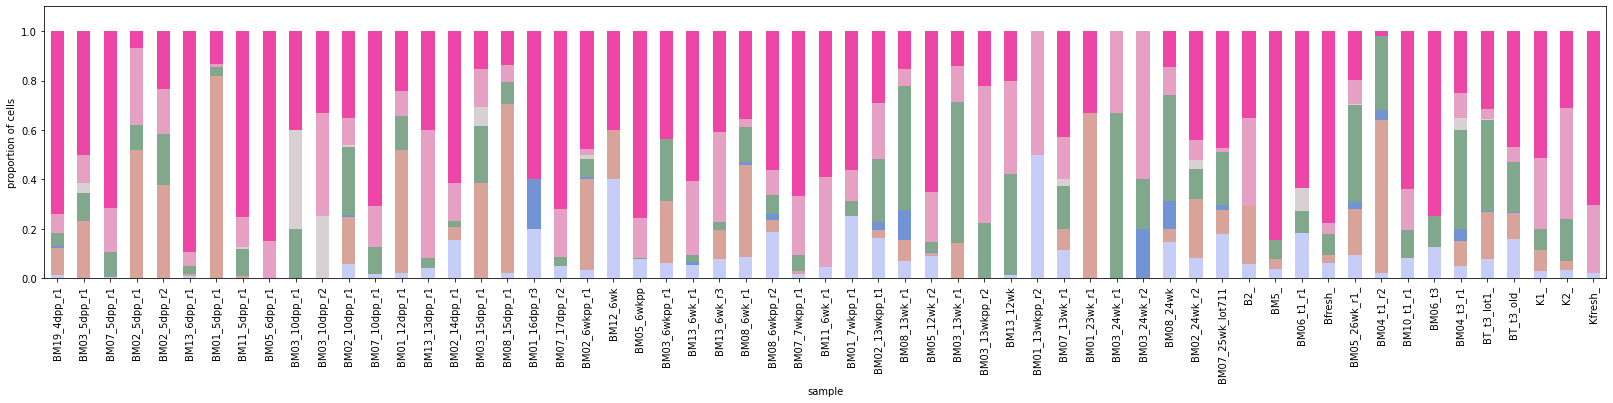

In [17]:
fig = plt.figure(figsize=(28,5))
ax1 = fig.add_subplot()
color_order = ["dendritic cells","neutrophils", "B cells", "T cells",  "eosinophils",'CSN1S1 macrophages','GPMNB macrophages']
ph.normalized_stacked_bar_plot(adata_immune,"sample","simplified celltypes",legend=False, x_order=ordered_samples,ax=ax1,color_order=color_order)
plt.savefig(figure_S5_path+"immune_stackedbar.pdf",bbox_inches="tight")

/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Trying to set attribute `.obs` of view, copying.


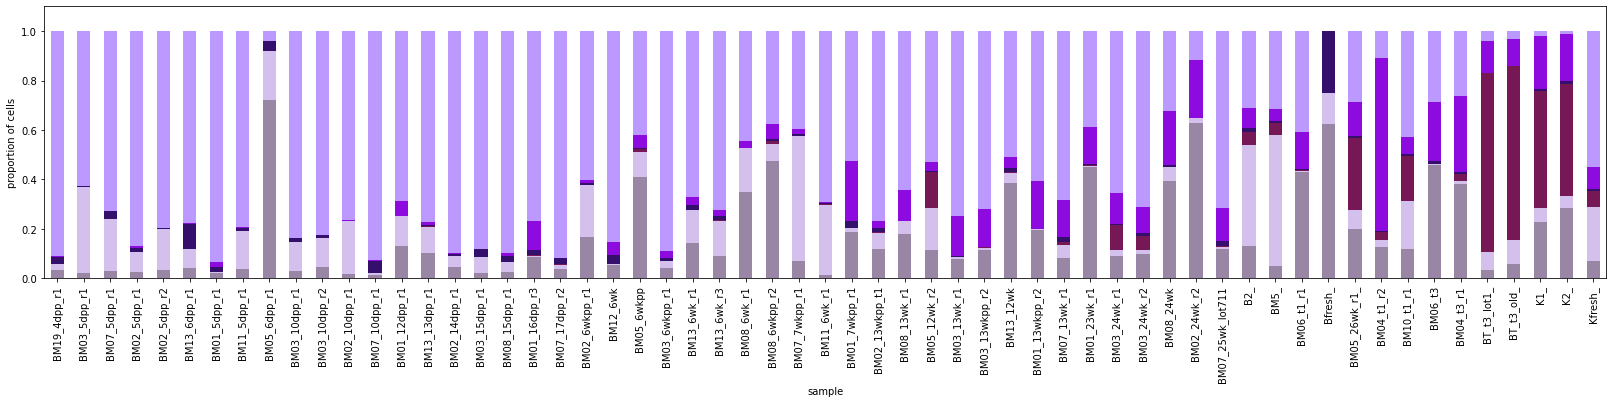

In [19]:
adata_epi = adata_no_doublets[~adata_no_doublets.obs['Epithelial Cell Subclusters'].isin(["nan"])]
epi_sub_colors={"Cycling Lactocytes": "#350F6C","KRT high lactocytes 1":"#D3C0EC", 
               "KRT high lactocytes 2": "#771856","LC1":'#9986A5', ##6E398F
                "MT High Secretory Lactocytes":"#8D0BDE","Secretory Lactocytes":'#bb99ff'} #"#C179ED""#C3AED1"
bm.set_colors_from_dict(adata_epi,epi_sub_colors,'Epithelial Cell Subclusters')
fig = plt.figure(figsize=(28,5))
ax1 = fig.add_subplot()
color_order = ["LC1","KRT high lactocytes 1","KRT high lactocytes 2","Cycling Lactocytes","MT High Secretory Lactocytes","Secretory Lactocytes"]
ph.normalized_stacked_bar_plot(adata_epi,"sample",'Epithelial Cell Subclusters',legend=False, x_order=ordered_samples,ax=ax1,color_order=color_order)
plt.savefig(figure_S5_path+"epi_stackedbar.pdf",bbox_inches="tight")

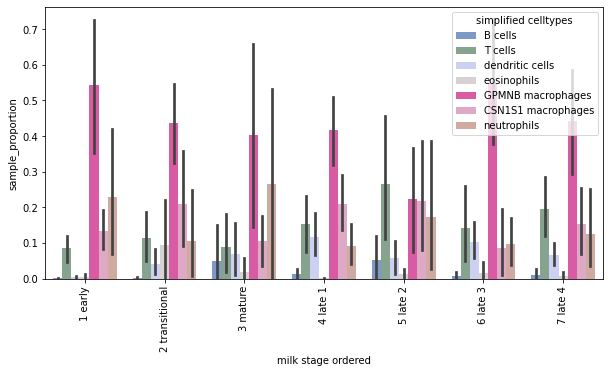

In [22]:
ph.boxplot_sample_proportions(adata_immune,"sample","simplified celltypes",hue="milk stage ordered",plottype="bar",swap=True)
plt.savefig(figure_S5_path+"immune_unstackedbar_errorbars.pdf",bbox_inches="tight")

In [31]:
mac_meta=pd.read_csv("../../Data/macrophage_metadata.csv",index_col=0)
mac_meta.index=["_".join(i.split("_")[2:]) for i in mac_meta.index]
overlap_cells = list(set(mac_meta.index).intersection(set(adata_immune.obs_names)))
adata_immune.obs.loc[overlap_cells,"macrophage_subclusters"] = mac_meta.loc[overlap_cells,"RNA_snn_res.0.2"].astype(int)

In [35]:
macrophage_cluster_colors = {"0":"#EDF8E9","1":"#BAE4B3","2":"#74C476","3":"#31A354","4":"#006D2C","nan":"#000000"}
adata_immune.obs["macrophage_subclusters"] = adata_immune.obs["macrophage_subclusters"].astype(str)
bm.set_colors_from_dict(adata_immune, macrophage_cluster_colors, "macrophage_subclusters")

In [36]:
adata_mac = adata_immune[~adata_immune.obs["macrophage_subclusters"].isin(["nan"])]

/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


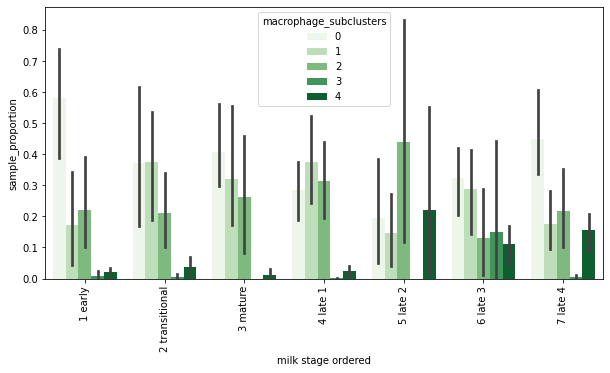

In [37]:
ph.boxplot_sample_proportions(adata_mac,"sample","macrophage_subclusters",hue="milk stage ordered",plottype="bar",swap=True)
plt.savefig(figure_S5_path+"mac_unstackedbar_errorbars.pdf",bbox_inches="tight")

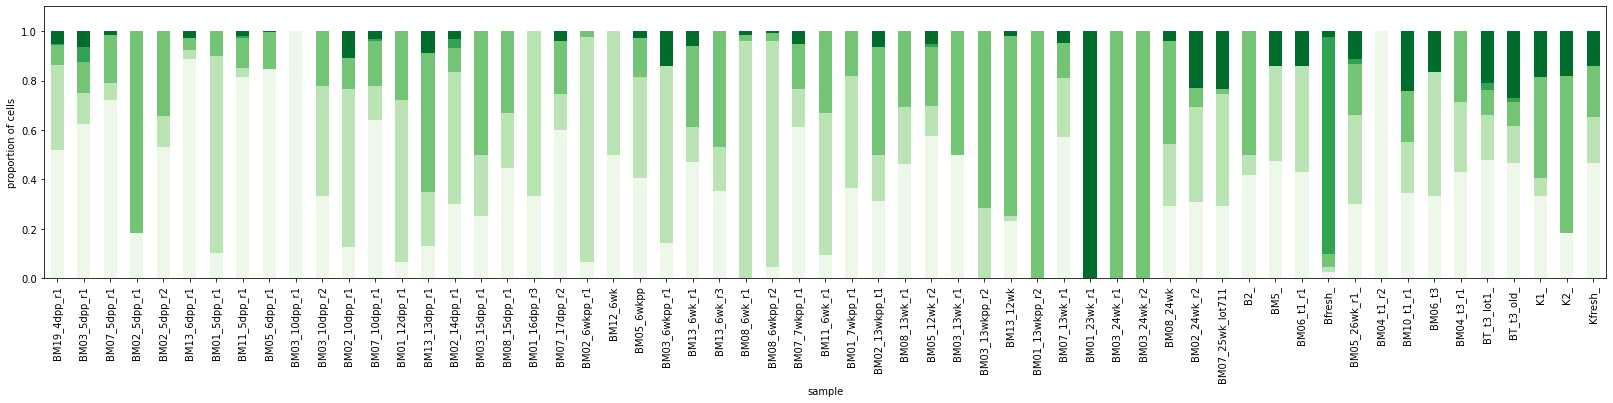

In [38]:
fig = plt.figure(figsize=(28,5))
ax1 = fig.add_subplot()
color_order = ["0","1","2","3","4"]
ph.normalized_stacked_bar_plot(adata_mac,"sample",'macrophage_subclusters',legend=False, x_order=ordered_samples,ax=ax1,color_order=color_order)
plt.savefig(figure_S5_path+"mac_stackedbar.pdf",bbox_inches="tight")

# Figure S6

Macrophage leave one donor out analysis

In [ ]:
import os

os.system("Rscript macrophage_leave_one_out.R")

In [43]:
mac_leave_one_out_clustering = pd.read_csv("../../Data/processed_data/macrophage_leave_one_donor_out_results.csv",index_col=0)

In [44]:
for i in mac_leave_one_out_clustering.columns:
    mac_leave_one_out_clustering[i] = mac_leave_one_out_clustering[i].astype(str).astype("category")

In [50]:
importlib.reload(ph)

<module 'plotting_helpers' from '../helper_functions/plotting_helpers.py'>

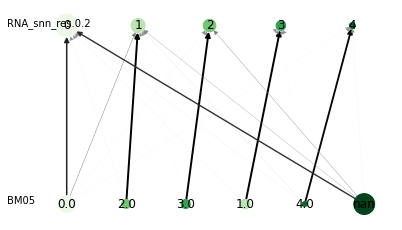

In [52]:
plt.rcParams["figure.figsize"]=(5,3)
ph.draw_clustergraph_from_df(mac_leave_one_out_clustering, ['BM05','RNA_snn_res.0.2' ],orders={"BM05":["0.0","2.0","3.0","1.0","4.0","nan"],"RNA_snn_res.0.2":["0","1","2","3","4"]})
plt.savefig(figure_S6_path+"bm05_mac_clustering_tree.pdf",bbox_inches="tight")

In [54]:
# calculate rand indices
import sklearn.metrics
rand_list = []
for d in ['BM02', 'BM12', 'BM03',
       'BM05', 'BM08', 'BM13', 'BM07', 'BM11', 'BM01', 'BM19', 'BM04', 'BM10',
       'BM06', 'BM16', 'BM17']:
    labels_pred = mac_leave_one_out_clustering.loc[mac_leave_one_out_clustering[d]!="nan",d]
    labels_true = mac_leave_one_out_clustering.loc[mac_leave_one_out_clustering[d]!="nan",'RNA_snn_res.0.2']
    rand_list.append(sklearn.metrics.adjusted_rand_score(labels_true, labels_pred))

In [55]:
rand_list

[0.9089751816525721,
 0.9739174417981041,
 0.9506592561319436,
 0.6627023695536607,
 0.923183352969214,
 0.9350211795054537,
 0.9553053729042904,
 0.933589508375595,
 0.95186774521991,
 0.9422820030607049,
 0.9491734354707274,
 0.9482525548591574,
 0.9708575989589331,
 0.9179580883453489,
 0.9093271633685232]

# Figure S7

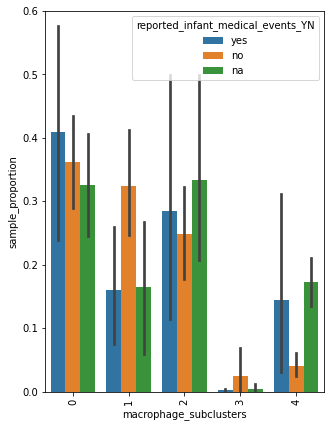

In [39]:
ph.boxplot_sample_proportions(adata_mac,"sample","macrophage_subclusters",hue="reported_infant_medical_events_YN",plottype="bar",swap=False,figsize=(5,7),hue_order=["yes","no","na"])
p=plt.gcf()
p.get_axes()[0].set_ylim(0,.6)

p.savefig(figure_S7_path+"mac_infant_medical_events.pdf",bbox_inches="tight")


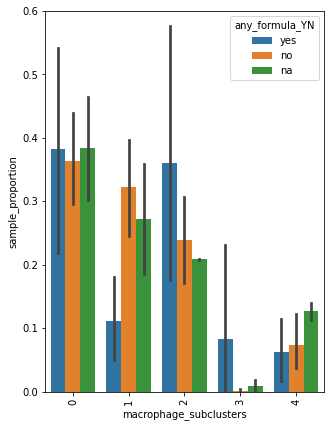

In [40]:
ph.boxplot_sample_proportions(adata_mac,"sample","macrophage_subclusters",hue='any_formula_YN',plottype="bar",figsize=(5,7),swap=False,hue_order=["yes","no","na"])
p=plt.gcf()
p.get_axes()[0].set_ylim(0,.6)

p.savefig(figure_S7_path+"mac_formula.pdf",bbox_inches="tight")


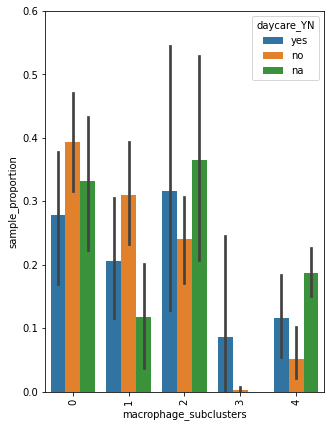

In [41]:
ph.boxplot_sample_proportions(adata_mac,"sample","macrophage_subclusters",hue='daycare_YN',figsize=(5,7),plottype="bar",swap=False,hue_order=["yes","no","na"])
p=plt.gcf()
p.get_axes()[0].set_ylim(0,.6)

p.savefig(figure_S7_path+"mac_daycare.pdf",bbox_inches="tight")


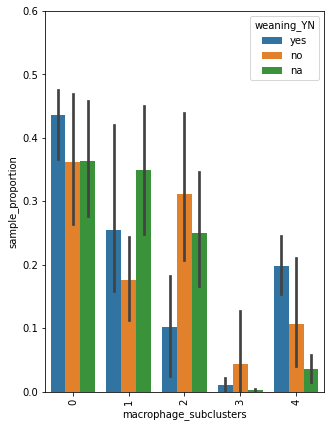

In [42]:
ph.boxplot_sample_proportions(adata_mac,"sample","macrophage_subclusters",hue='weaning_YN',figsize=(5,7),plottype="bar",swap=False,hue_order=["yes","no","na"])
p=plt.gcf()
p.get_axes()[0].set_ylim(0,.6)

p.savefig(figure_S7_path+"mac_weaning.pdf",bbox_inches="tight")